In [1]:
import pandas as pd

gene = pd.read_csv("../../data/Ch12Ex13.csv", header=None)
gene

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.961933,0.441803,-0.975005,1.417504,0.818815,0.316294,-0.024967,-0.063966,0.031497,-0.350311,...,-0.509591,-0.216725,-0.055506,-0.484449,-0.521581,1.949135,1.324335,0.468147,1.061100,1.655970
1,-0.292526,-1.139267,0.195837,-1.281121,-0.251439,2.511997,-0.922206,0.059543,-1.409645,-0.656712,...,1.700708,0.007290,0.099062,0.563853,-0.257275,-0.581781,-0.169887,-0.542304,0.312939,-1.284377
2,0.258788,-0.972845,0.588486,-0.800258,-1.820398,-2.058924,-0.064764,1.592124,-0.173117,-0.121087,...,-0.615472,0.009999,0.945810,-0.318521,-0.117889,0.621366,-0.070764,0.401682,-0.016227,-0.526553
3,-1.152132,-2.213168,-0.861525,0.630925,0.951772,-1.165724,-0.391559,1.063619,-0.350009,-1.489058,...,-0.284277,0.198946,-0.091833,0.349628,-0.298910,1.513696,0.671185,0.010855,-1.043689,1.625275
4,0.195783,0.593306,0.282992,0.247147,1.978668,-0.871018,-0.989715,-1.032253,-1.109654,-0.385142,...,-0.692998,-0.845707,-0.177497,-0.166491,1.483155,-1.687946,-0.141430,0.200778,-0.675942,2.220611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.075148,3.003267,-0.123441,-1.036740,-1.270604,-1.277029,-0.278504,1.249723,-0.706994,-0.704671,...,0.842161,-0.762154,0.546881,1.586981,-0.242043,0.507189,1.297424,0.314290,-1.513097,-0.074709
996,-1.226125,-0.501702,-0.717430,-0.169113,0.599530,-0.997987,0.028236,0.200508,-1.364865,0.564957,...,-1.012523,0.593252,-0.594506,-1.443559,-0.028870,0.052170,-0.867227,0.228531,-0.207759,-0.209665
997,-3.056328,0.449889,1.880362,-0.742841,2.238346,-0.291738,1.270233,0.696415,1.242857,0.429148,...,0.135085,-0.732077,-0.037468,-0.836689,0.020274,-0.803306,-0.907277,-0.781791,0.069908,1.336894
998,1.450658,1.310348,0.383837,-0.408860,-0.471111,-1.392396,-0.805808,0.210900,1.727079,0.862870,...,0.109018,-0.128522,0.860270,0.765015,-2.360090,0.252699,-1.461818,-0.812342,-1.095099,-1.460114


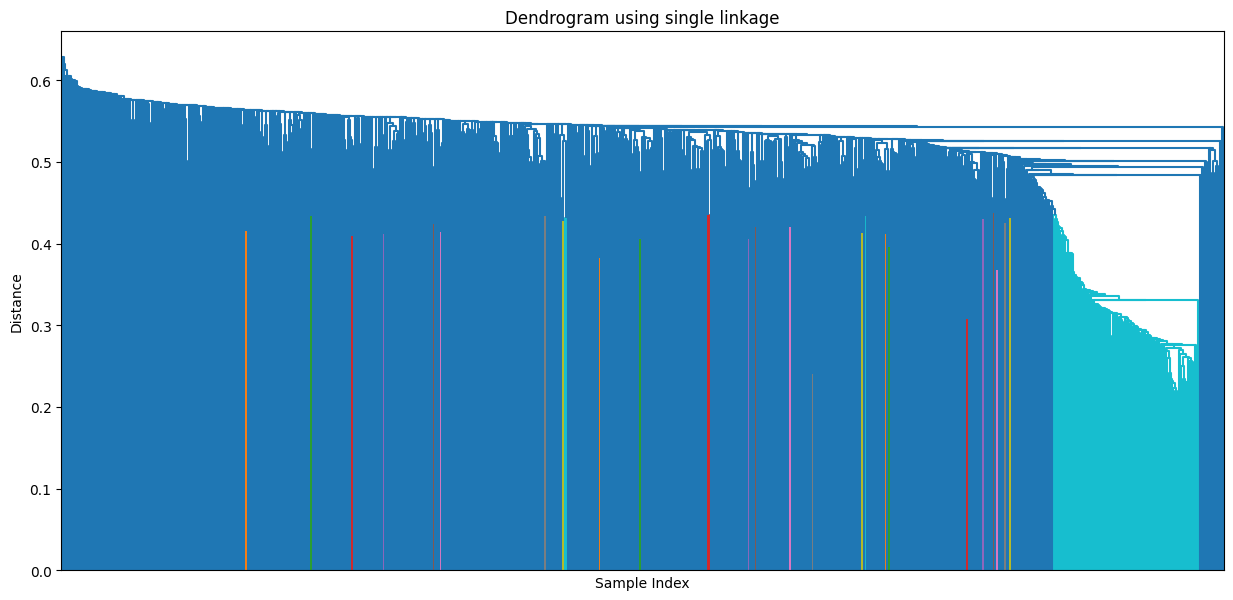

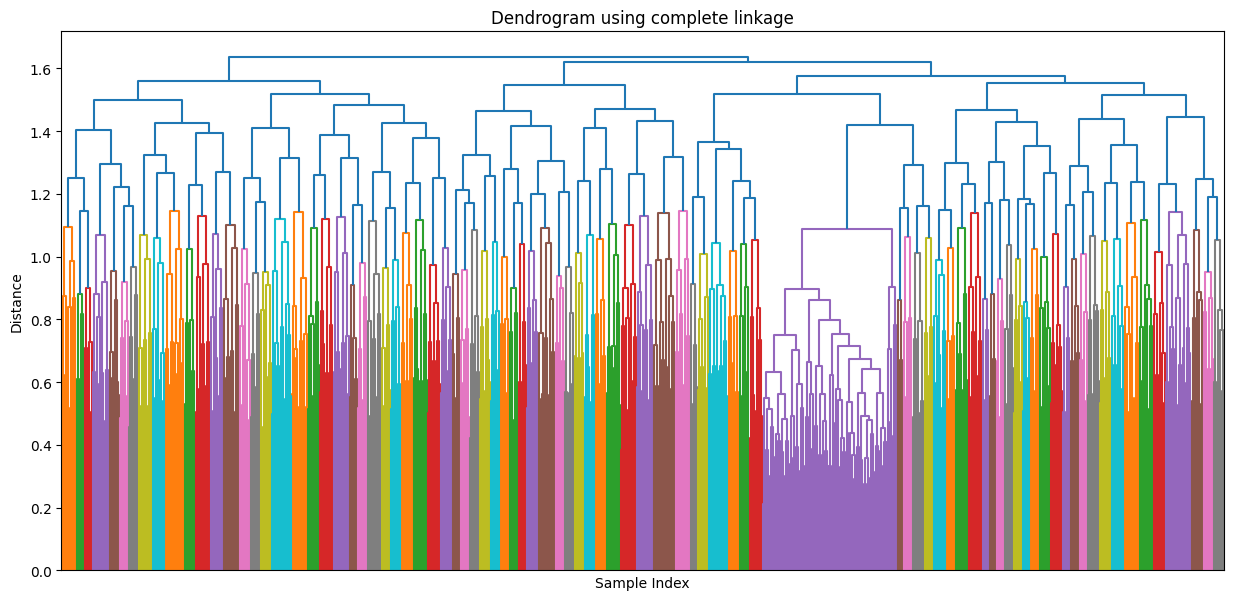

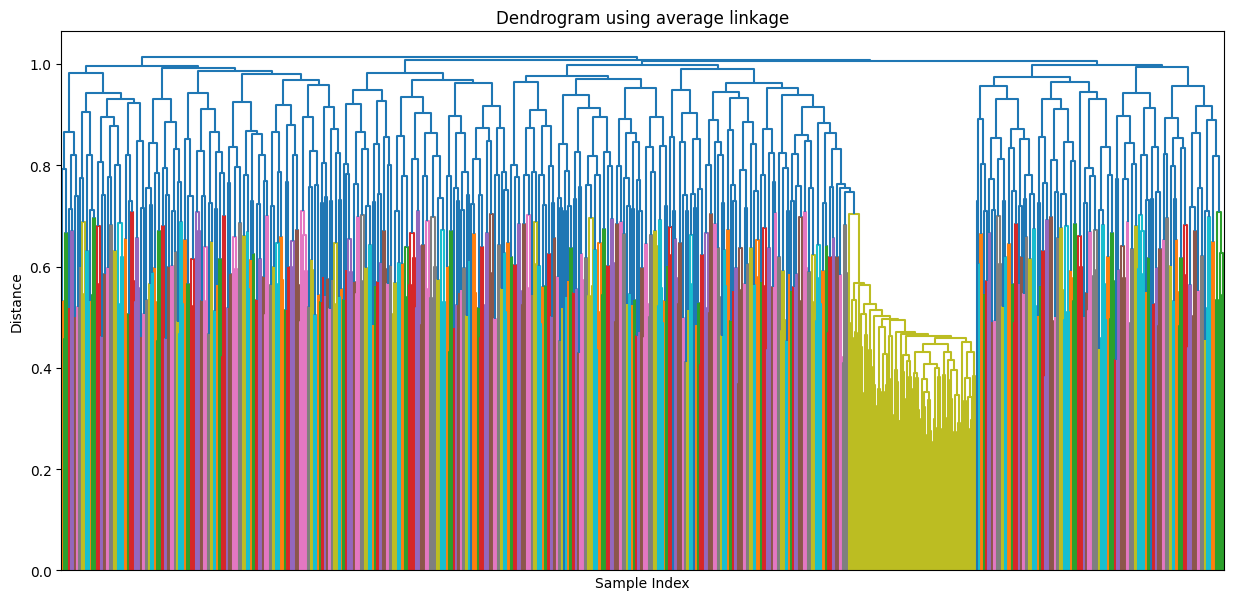

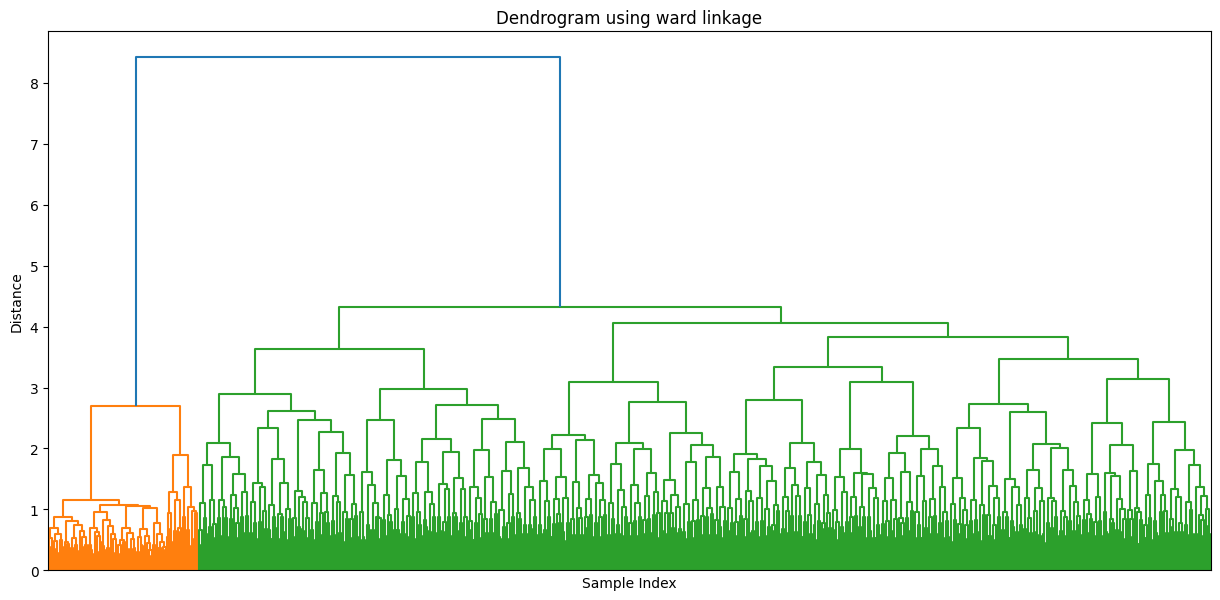

In [5]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

X = gene.values

corr_matrix = np.corrcoef(X)
dist_matrix = 1 - corr_matrix
dist_condensed = squareform(dist_matrix, checks=False)

for method in ['single', 'complete', 'average', 'ward']:
    plt.figure(figsize=(15, 7))  # bigger figure
    Z = linkage(dist_condensed, method=method)
    dendrogram(Z, labels=np.arange(1, X.shape[0]+1))
    plt.title(f"Dendrogram using {method} linkage")
    plt.xlabel("Sample Index")
    plt.ylabel("Distance")
    plt.xticks([])
    plt.show()

In [4]:
from scipy.stats import ttest_ind

healthy = X[:20, :]
diseased = X[20:, :]

t_stats, p_values = ttest_ind(healthy, diseased, axis=0)

top_genes = np.argsort(p_values)[:10]
print("Top 10 genes differing between healthy and diseased samples:")
print(top_genes)

print(p_values[top_genes])

Top 10 genes differing between healthy and diseased samples:
[28 29 39 21 25 36 32 35 27 24]
[6.36464412e-05 1.70892897e-04 2.57318257e-04 2.81040848e-04
 5.40301154e-04 6.44843805e-04 1.55226507e-03 1.64042751e-03
 1.72072391e-03 2.47438845e-03]
